In [89]:
def g_new(z, k):
    Z = z+1
    Z_c = 3.5
    return Z**k/(1+Z/Z_c)**k

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math
import csv

frb, telescope, snr, f_p, d_L, z = [], [], [], [], [], []

with open('frb.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            line_count += 1
            continue
        line_count += 1
        if float(row[2]) > 6:
            frb.append(row[0])
            telescope.append(row[1])
            snr.append(float(row[2]))
            f_p.append(float(row[3]))
            d_L.append(float(row[4]))
            z.append(float(row[5]))
        '''
        else: 
            frb.append(row[0])
            telescope.append(row[1])
            snr.append(6)
            f_p.append(float(row[3]))
            d_L.append(float(row[4]))
            z.append(float(row[5]))
        '''
    print(f'Processed {line_count} lines.')

Processed 64 lines.


In [91]:
#Deriving New Parameters
f_lim = []
L_p = []
L_plim = []

for i in range(len(f_p)):
    f_lim_i = f_p[i]/(snr[i])
    L_p_i = (f_p[i]*1e-26)*4*math.pi*(d_L[i]*3.08567758e25)**2
    L_plim_i = (f_lim_i*1e-26)*4*math.pi*(d_L[i]*3.08567758e25)**2
    f_lim.append(f_lim_i)
    L_p.append(L_p_i)
    L_plim.append(L_plim_i)

In [92]:
telescope = [telescope[i].lower() for i in range(len(telescope))] #removing the uppercase Parkes
set(telescope)

{'askap', 'parkes'}

In [93]:
def new_L(L, z, k=0, g=g_new):
    return [L[i]/g(z[i], k) for i in range(len(L))]

In [94]:
L_lim = []
f_lim = [14.8, 0.15, 0.30]
for i in range(len(f_p)):
    if(i < 27): #ASKAP
        L_lim.append(L_p[i] * f_lim[0]/f_p[i])
    elif(i >= 27 and i < 54): #Parkes
        L_lim.append(L_p[i] * f_lim[1]/f_p[i])

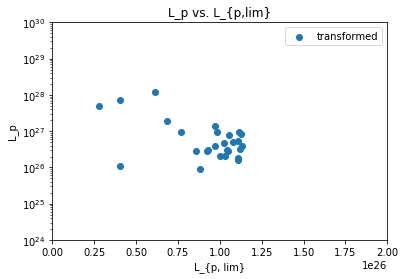

In [95]:
fig, ax = plt.subplots()
kval = 8.2
ax.set_yscale('log')
ax.set_xscale('linear')
#ax.scatter(L_lim[27:54], L_p[27:54], label='parkes')
ax.scatter(new_L(L_lim[27:54], z[27:54], k=kval, g=g_new),
          new_L(L_p[27:54], z[27:54], k=kval, g=g_new), label = 'transformed')
#ax.plot([1e20, 1e32], [1e20, 1e32], label='L_p = L_{p,lim}', color='black')
#ax.set_xlim([1e24, 1e30])
ax.set_xlim([0,2e26])
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('L_{p, lim}')
ax.set_ylabel('L_p')
ax.set_title('L_p vs. L_{p,lim}')
ax.legend()
plt.show()

Text(0, 0.5, 'L_peak')

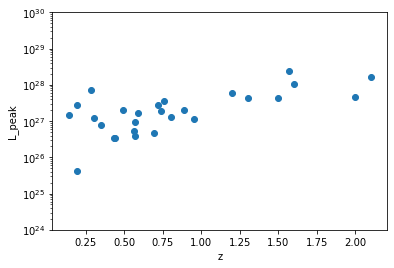

In [96]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.scatter(z[27:54], L_p[27:54], label='parkes')
ax.set_ylim([1e24, 1e30])
ax.set_xlabel('z')
ax.set_ylabel('L_peak')

In [98]:
stuff = new_L(L_lim[27:54], z[27:54], k=kval, g=g_new)

In [99]:
max(stuff)

1.1337865456879392e+26

In [100]:
min(stuff)

2.7772918161493955e+25

In [101]:
sum(stuff)/len(stuff)

9.175020340614087e+25